#<font color='red'>Data Acquisition and Understanding

#Data_HistoIndice

##IMPORT LIBRARIES

In [ ]:
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 921.1 kB/s eta 0:00:00


In [ ]:
# module imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import random
import os
import datetime as dt

# import mplfinance as mpf


##IMPORT DATA

In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive (security note included again)
drive.mount('/content/drive')  # This creates an authentication token, be cautious with source

# Define the path to your file (replace 'indices' with your actual folder name if different)
file_path = '/content/drive/My Drive/indices/all_filtered_data21.csv'

# Read the CSV data using pandas
data = pd.read_csv(file_path)



Mounted at /content/drive


In [ ]:
print(data.head())


         Date  Price   Open   High    Low     Vol.  Change % Sector  value  \
0  2020-09-21   6.40   6.30   6.40   6.30   1040.0     -0.78  other    MNP   
1  2020-09-21   3.45   3.55   3.58   3.45   4290.0     -2.82  other    TPR   
2  2020-09-21  22.45  22.50  22.50  22.27  10570.0     -0.24  other  ECYCL   
3  2020-09-21   4.00   4.00   4.00   3.90   7580.0      1.52  other  ARTES   
4  2020-09-22   3.46   3.46   3.49   3.46   4240.0      0.29  other    TPR   

     Variance  ...  Volatility  Skewness   Kurtosis    Q1     Q3   Min    Max  \
0  447.821045  ...   21.161783  3.723487  15.877719  2.91  12.64  0.11  174.9   
1  447.821045  ...   21.161783  3.723487  15.877719  2.91  12.64  0.11  174.9   
2  447.821045  ...   21.161783  3.723487  15.877719  2.91  12.64  0.11  174.9   
3  447.821045  ...   21.161783  3.723487  15.877719  2.91  12.64  0.11  174.9   
4  447.821045  ...   21.161783  3.723487  15.877719  2.91  12.64  0.11  174.9   

   Stock_Return       Beta  segmentation  
0

In [ ]:
print(data.columns)

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'Sector',
       'value', 'Variance', 'Return', 'Volatility', 'Skewness', 'Kurtosis',
       'Q1', 'Q3', 'Min', 'Max', 'Stock_Return', 'Beta', 'segmentation'],
      dtype='object')


With a 95% confidence level, the VaR of 2.83% suggests that your portfolio has historically been relatively stable, and there's a low probability of experiencing a daily loss greater than 2.83%. However, it's important to remember:

<ipython-input-26-1e0382bdae61>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_data['Daily Return'] = var_data['Change %'] / 100  # Assuming 'Change %' is a numeric value


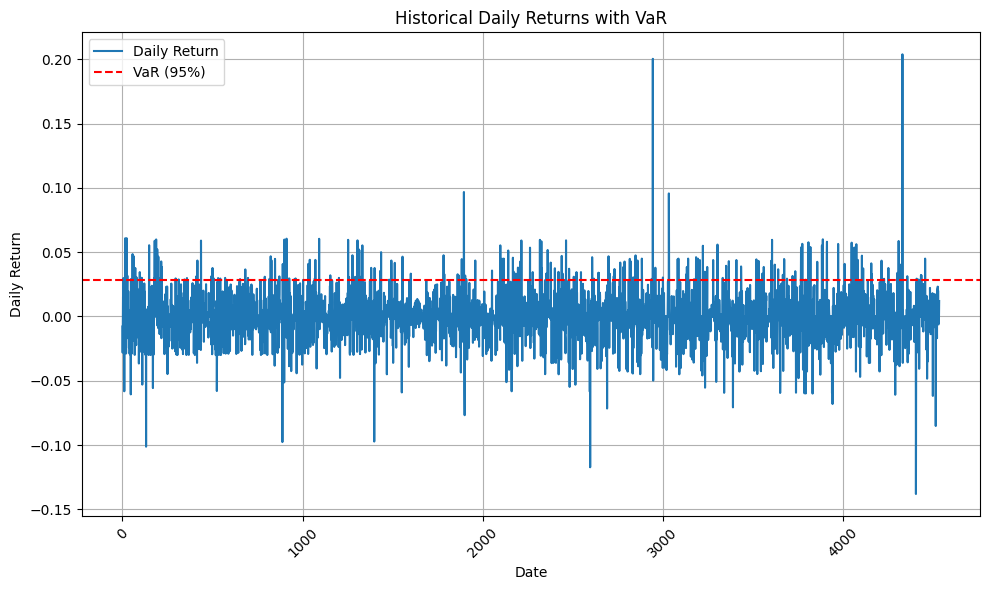

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming these columns are relevant for VaR calculation in your data
var_cols = ['Date', 'Price', 'Change %']  # Adjust based on your actual columns
var_data = data[var_cols]

if 'Change %' not in var_data.columns:
  # Assuming 'Price' is available for daily return calculation
  var_data['Daily Return'] = var_data['Price'].pct_change()  # Percentage change
else:
  var_data['Daily Return'] = var_data['Change %'] / 100  # Assuming 'Change %' is a numeric value

# Calculate VaR (assuming 95% confidence level)
confidence_level = 0.95
sorted_returns = var_data['Daily Return'].sort_values(ascending=True)
var_percentile = int(confidence_level * len(sorted_returns))
var_value = abs(sorted_returns.iloc[var_percentile])

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size as desired
plt.plot(var_data.index, var_data['Daily Return'], label='Daily Return')
plt.axhline(y=var_value, color='r', linestyle='--', label=f'VaR ({confidence_level*100:.0f}%)')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('Historical Daily Returns with VaR')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability with many dates

# Display the plot
plt.tight_layout()
plt.show()


[link text](https://)Value at Risk (Historical)

This is the actual VaR value, represented as a negative number because it refers to a potential loss. In this case, -0.09 signifies that, with 95% confidence, your portfolio's value is not expected to decrease by more than 0.09 (which could be a percentage, depending on your data) within the chosen time horizon

Value At Risk (parametric)

-0.07: This is the actual VaR value, represented as a negative number because it refers to a potential loss. In this case, -0.07 signifies that, with 95% confidence, your portfolio's value is not expected to decrease by more than 0.07 (which could be a percentage, depending on your data) within the chosen time horizon

MonteCarlo simulation

Monte Carlo Simulation Results:
Number of Simulations: 1000
Number of Days Simulated: 30
Average Daily Prices:
100.089516
100.209431
100.327837
100.411262
100.479863
100.593285
100.686355
100.794344
100.933632
101.058255
101.142302
101.254759
101.310027
101.403260
101.480855
101.589358
101.649985
101.690734
101.767605
101.814582
101.880284
101.960917
102.082226
102.200757
102.272386
102.405440
102.489890
102.594275
102.723136
102.845635
Summary of Final Day Prices (Descriptive Statistics):
count    1000.000000
mean      102.845635
std         5.831911
min        82.787171
25%        98.953062
50%       102.834683
75%       106.783699
max       121.835475
Name: Day_31, dtype: float64


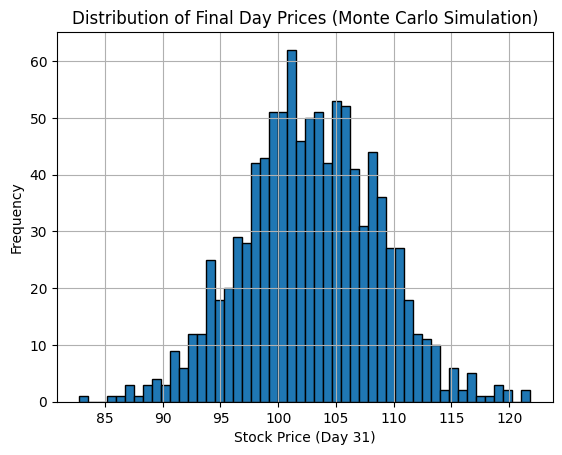

In [ ]:
try:
  from random import normalvariate  # For Python 2.x
except ImportError:
  import numpy as np  # For Python 3.x

def monte_carlo_simulation(initial_price, drift, volatility, num_simulations, num_days):
  """
  Simulates stock price movements using Monte Carlo Simulation.

  Args:
      initial_price (float): The initial stock price.
      drift (float): The expected daily return (drift) of the stock.
      volatility (float): The daily volatility of the stock price.
      num_simulations (int): The number of simulations to run.
      num_days (int): The number of days to simulate the price movement for.

  Returns:
      pandas.DataFrame: A DataFrame containing the simulated stock prices for each day and simulation.
  """

  # Column names for simulated daily returns
  daily_return_cols = [f"Daily_Return_{i+1}" for i in range(num_days)]

  # Daily price changes (handle Python version difference)
  if hasattr(np.random, 'normal'):  # Check for NumPy's normal function (Python 3.x)
    daily_returns = np.random.normal(drift, volatility, size=(num_simulations, num_days))
  else:
    daily_returns = [normalvariate(drift, volatility) for _ in range(num_simulations * num_days)]
    daily_returns = np.reshape(daily_returns, (num_simulations, num_days))  # Reshape for Python 2.x

  # Calculate the simulated stock prices for each day and simulation
  simulated_prices = np.zeros((num_simulations, num_days + 1))
  simulated_prices[:, 0] = initial_price
  for i in range(1, num_days + 1):
    simulated_prices[:, i] = simulated_prices[:, i-1] * (1 + daily_returns[:, i-1])

  return pd.DataFrame(simulated_prices, columns=[*daily_return_cols, f"Day_{num_days+1}"])

# Example usage (replace with your data and parameters)
initial_price = 100
drift = 0.001  # Daily expected return
volatility = 0.01  # Daily volatility
num_simulations = 1000
num_days = 30

simulated_prices = monte_carlo_simulation(initial_price, drift, volatility, num_simulations, num_days)

# Calculate summary statistics
average_prices = simulated_prices.iloc[:, 1:].mean(axis=0)  # Average price at each day
final_day_prices = simulated_prices.iloc[:, -1]  # Final day prices across simulations

# Print summary statistics
print("Monte Carlo Simulation Results:")
print(f"Number of Simulations: {num_simulations}")
print(f"Number of Days Simulated: {num_days}")
print(f"Average Daily Prices:\n{average_prices.to_string(index=False)}")  # Nicely formatted output
print(f"Summary of Final Day Prices (Descriptive Statistics):")
print(final_day_prices.describe())  # Print descriptive statistics (mean, std, percentiles)

# Import matplotlib for visualization (if not already installed)
import matplotlib.pyplot as plt

# Plot the distribution of final day prices (histogram)
plt.hist(final_day_prices, bins=50, edgecolor='black')
plt.xlabel('Stock Price (Day {})'.format(num_days + 1))
plt.ylabel('Frequency')
plt.title('Distribution of Final Day Prices (Monte Carlo Simulation)')
plt.grid(True)
plt.show()

# Further Analysis (optional)
# You can plot the price paths of some simulations or analyze other aspects...


Max Drawdown

In [ ]:
def calculate_max_drawdown(prices):
  """
  Calculates the maximum drawdown (MDD) of a pandas Series containing asset prices.

  Args:
      prices: A pandas Series containing asset prices (e.g., closing prices).

  Returns:
      A tuple containing:
          - max_drawdown: The maximum drawdown as a float (percentage change).
          - drawdown_start: The index of the price at the start of the drawdown period.
          - drawdown_end: The index of the price at the end of the drawdown period.
  """

  # Calculate the cumulative maximum price
  rolling_max = prices.cummax()

  # Calculate the drawdown at each point by subtracting the current price from the cumulative maximum
  drawdown = prices - rolling_max

  # Handle potential negative values due to rounding errors (set them to zero)
  drawdown = drawdown.clip(lower=0)

  # Find the maximum drawdown (largest negative value in the drawdown Series)
  max_drawdown = drawdown.max()

  # Find the index of the price at the start of the drawdown period
  drawdown_start = drawdown.idxmax()

  # Find the index of the price at the end of the drawdown period
  drawdown_end = prices[drawdown == max_drawdown].index[-1]

  # Return the calculated values (no need to print within the function)
  return max_drawdown, drawdown_start, drawdown_end

# Assuming your data is in a DataFrame named 'data' and 'Close' is your closing price column
prices = data['Price']

# Calculate maximum drawdown
max_drawdown, drawdown_start, drawdown_end = calculate_max_drawdown(prices)

# Print the results outside the function (after calculation)
print("Maximum Drawdown:", max_drawdown)
print("Drawdown Start Date:", data.loc[drawdown_start, 'Date'])  # Assuming 'Date' is your date column
print("Drawdown End Date:", data.loc[drawdown_end, 'Date'])


Maximum Drawdown: 0.0
Drawdown Start Date: 2020-09-21
Drawdown End Date: 2023-09-21


Maximum Drawdown: 0.0 - This signifies that your asset hasn't experienced any drawdown during the analyzed period. A drawdown refers to a peak-to-trough decline in the asset's price. Since the maximum drawdown is 0.0 (or 0%), it suggests that the price has either consistently increased or remained flat throughout the observed timeframe.

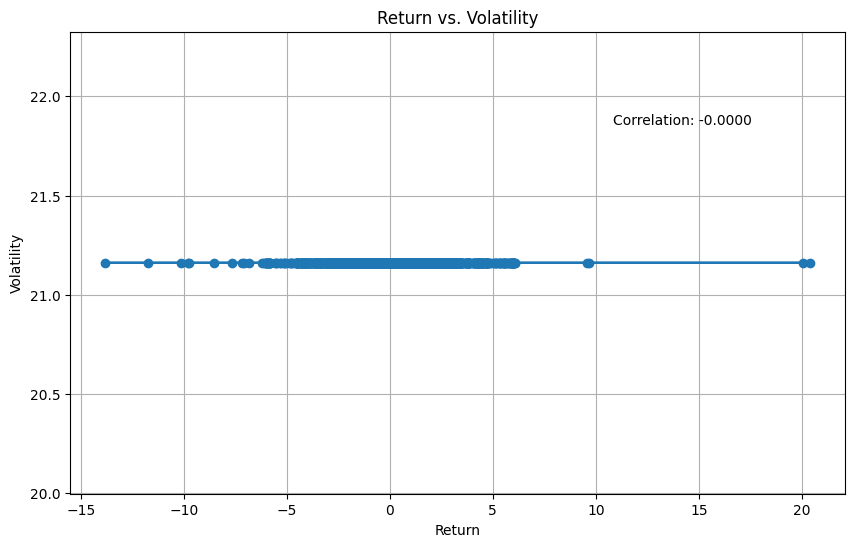

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is in a DataFrame named 'data'
#data = pd.read_csv("your_data.csv")

# Select variables (replace with your actual column names)
var1 = data['Return']
var2 = data['Volatility']

# Calculate correlation coefficient
correlation = var1.corr(var2)

# Create line plot
plt.figure(figsize=(10, 6))
plt.plot(var1, var2, marker='o', linestyle='-')
plt.xlabel('Return')
plt.ylabel('Volatility')

# Add annotation with correlation coefficient (adjust position as needed)
plt.annotate(f"Correlation: {correlation:.4f}", xy=(0.7, 0.8), xycoords='axes fraction')

# Display plot
plt.grid(True)
plt.title('Return vs. Volatility')
plt.show()


A correlation coefficient close to zero signifies a very weak linear relationship between return and volatility. In simpler terms, there's almost no connection between how much the price fluctuates (volatility) and how much the price goes up or down (return) over the observed period in your data..